### Installing libraries required

In [7]:
!pip install transformers sentencepiece diffusers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Generating style cues from a prompt

In [8]:
from transformers import pipeline

text_pipe = pipeline('text-generation', model='daspartho/prompt-extend', device=0)

prompt = "munchkin village house"
extended_prompt = text_pipe(prompt+',', num_return_sequences=1)[0]["generated_text"]
extended_prompt

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1364: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 50 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


'munchkin village house, concept art, octane render, 8 k, hd, high details, trending on artstation, deviantart, high resolution, high definition, hyper detailed, 3 d, 4 k, high resolution, unreal engine 5, award winning, masterpiece'

### Trying the prompts with stable diffusion

#### Setting up stable diffusion

Be sure to login with a auth token for stable diffusion :)

In [9]:
from huggingface_hub import notebook_login
from diffusers import StableDiffusionPipeline
from pathlib import Path
import torch

if not (Path.home()/'.huggingface'/'token').exists(): 
    notebook_login()

In [10]:
sd_pipe = StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", 
    revision="fp16", 
    torch_dtype=torch.float16,
).to("cuda")

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


#### Image generated using input prompt

  0%|          | 0/51 [00:00<?, ?it/s]

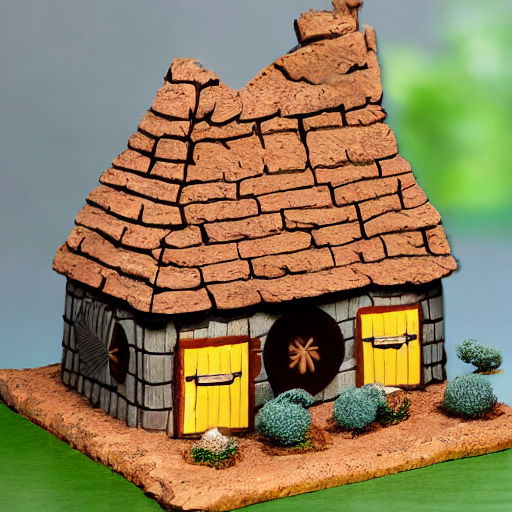

In [11]:
torch.manual_seed(32)
sd_pipe(prompt).images[0]

#### Image generated using extended prompt

  0%|          | 0/51 [00:00<?, ?it/s]

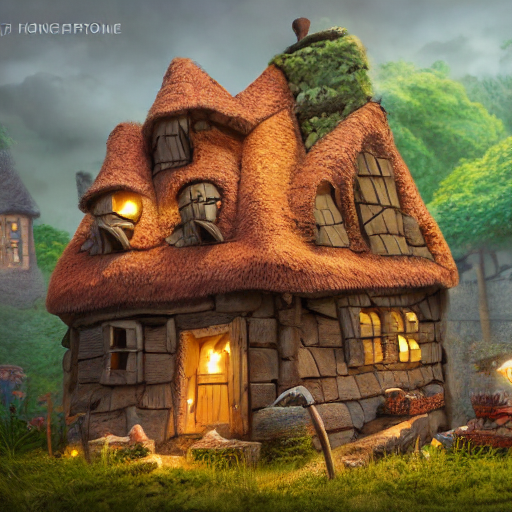

In [12]:
torch.manual_seed(32)
sd_pipe(extended_prompt).images[0]